In [18]:
# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier
'''
In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

SyntaxError: invalid character in identifier (<ipython-input-18-6e51a2332357>, line 6)

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [200]:

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# Load pickled data
import pickle
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from matplotlib import gridspec
import tensorflow as tf
import numpy as np

%matplotlib inline

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())



# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/macbook/PycharmProjects/untitled2/traffic-signs-data/train.p'
#validation_file='/Users/macbook/PycharmProjects/untitled2/traffic-signs-data/valid.p'
testing_file = '/Users/macbook/PycharmProjects/untitled2/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Done')

Done


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

####1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the pandas library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 27839
* The size of the validation set is 6960
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,1)
* The number of unique classes/labels in the data set is 43

####2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data ...

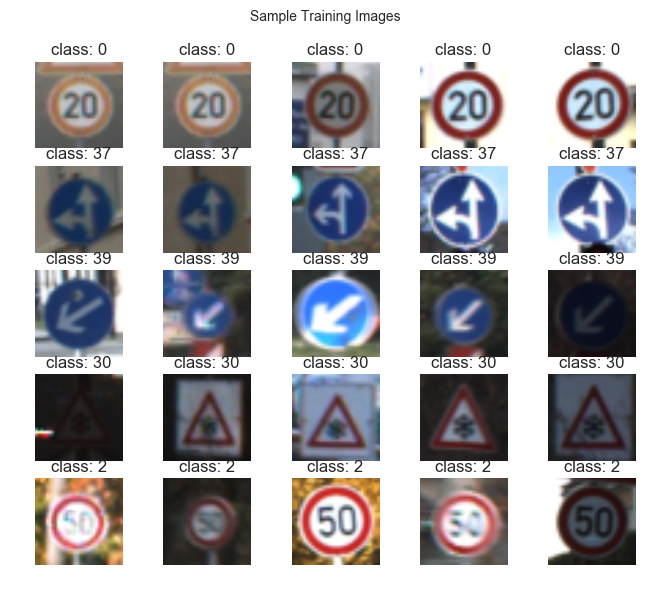

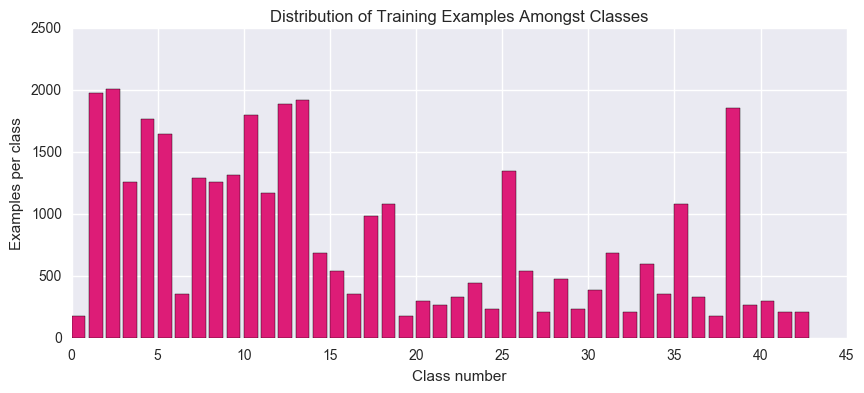

(34799, 32, 32, 3)


In [201]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2
#import util

%matplotlib inline

def display_images(image_dataset, n_rows, n_cols, graph_title='Sample Training Images'):
    '''
    Simple utility function for displaying images.
    '''
    plt.figure(figsize=(8, 6.5))
    selected_classes = np.random.randint(44, size=n_rows)
    image_number = 1
    for row in selected_classes:
        for col in range(1, n_cols + 1):
            plt.subplot(n_rows, n_cols, image_number)
            image_number += 1
            x_selected = X_train[y_train == row]
            random_index = np.random.randint(x_selected.shape[0])
            plt.imshow(x_selected[random_index, :, :, :]) 
            plt.axis('off')
            plt.title('class: {}'.format(row))  
    plt.suptitle(graph_title)
    plt.show()
    
    
def draw_class_distribution(class_labels):
    '''This function is used to plot the distribution of training examples amongst classes.'''
    plt.figure(figsize=(10, 4))
    examples_per_class = np.bincount(class_labels)
    num_classes = len(examples_per_class)
    plt.bar(np.arange(num_classes), examples_per_class, 0.8, color='#dd1c77', label='Inputs per class')
    plt.xlabel('Class number')
    plt.ylabel('Examples per class')
    plt.title('Distribution of Training Examples Amongst Classes')
    plt.show()   
    
display_images(X_train, 5, 5)
draw_class_distribution(y_train)
print(X_train.shape)

In [202]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import tensorflow as tf


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
#n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
#print("Number of validating examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

####Question 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale because I want to the images to be 1 channel only.
As a last step, I normalized the image because so the image data will range from [-1,1] and easy for processing.
Here is an example of a traffic sign image before and after grayscaling and normalization.
![alt text][image2]

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)
Done
-0.354081335648
Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


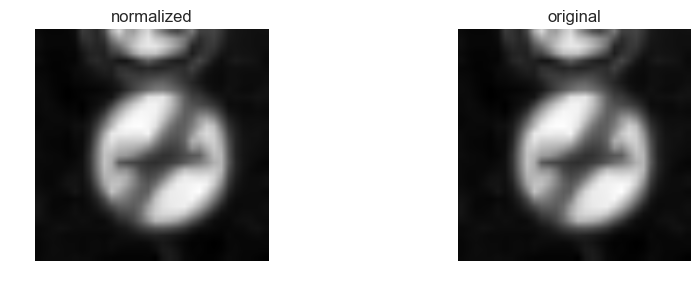

In [203]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Step: 1 Converting RGB to Grayscale


X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

#X_valid_rgb = X_valid
#X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)
print('Done')
#print('X_valid Grayscale shape',X_valid_gry.shape)


X_train = X_train_gry
X_test = X_test_gry


#Step2 Mix-Max Normalization

import numpy as np
def min_max_normalization(x):
    Min=np.min(x)
    Max=np.max(x)
    normal_x=(x-Min)/(Max-Min)
    return normal_x
    
#print(np.mean(X_train))
#print(np.min(X_train))
#print(np.max(X_train))
#X_train_maxmin =min_max_normalization(X_train)   #(X_train-128)/128
X_train_maxmin =(X_train-128)/128
#X_test_maxmin = min_max_normalization(X_test)  #(X_test-128)/128 
X_test_maxmin = (X_test-128)/128 
#X_valid_maxmin = min_max_normalization(X_valid)  #(X_valid-128)/128

print(np.mean(X_train_maxmin))

print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_maxmin.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_maxmin[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

In [204]:
X_train = X_train_maxmin
X_test = X_test_maxmin

print('done')


done


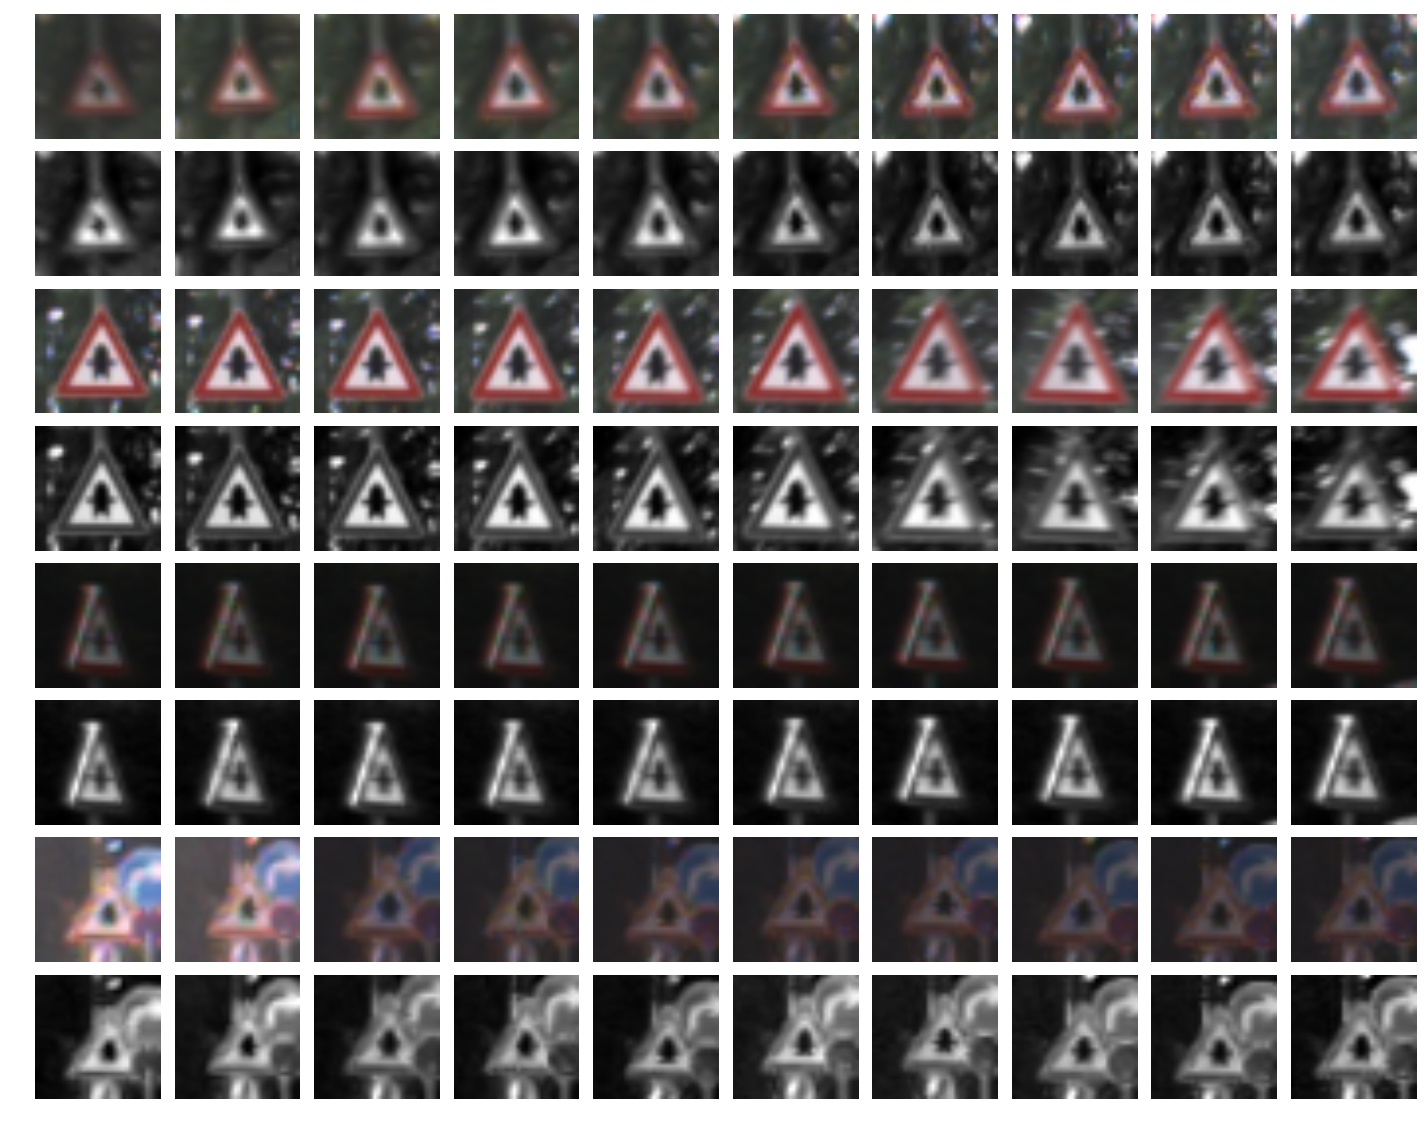

In [205]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [206]:
#Shuffling DATA

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test,y_test)
#X_valid, y_valid = shuffle(X_valid,y_valid)
print('Done')
#print(X_valid.shape)


Done


In [207]:
## Split validation dataset off from training dataset
import sklearn

from sklearn.model_selection import train_test_split

X_train_2, X_valid_2, y_train, y_valid_2 = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train))
print("New X_train size:",len(X_train_2))
print("X_validation size:",len(X_valid_2))

X_train=X_train_2
X_valid=X_valid_2
y_valid=y_valid_2


Old X_train size: 34799
New X_train size: 27839
X_validation size: 6960


### Model Architecture

####Question 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

Firstly I used the orignally Lenet model architechture, but the accuracy rate can not reach to 93% or higher.
So I read the Lecun lecture and optimize the architechture as follows.
    
    1	5x5 convolution (32x32x1 in, 28x28x6 out)
	2	ReLU
	3	2x2 max pool (28x28x6 in, 14x14x6 out)
	4	5x5 convolution (14x14x6 in, 10x10x16 out)
	5	ReLU
	6	2x2 max pool (10x10x16 in, 5x5x16 out)
	7	5x5 convolution (5x5x6 in, 1x1x400 out)
	8	ReLu
	9	Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
	10	Concatenate flattened layers to a single size-800 layer
	11	Dropout layer
	12	Fully connected layer (800 in, 43 out)

In [208]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 100

print('Done')


Done


In [209]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
      
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
     # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID')+conv3_b
                     
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Flatten Layer2. Input = 5x5x16. Output = 400.
    conv2flat = flatten(conv2)
    print("layer2flat shape:",conv2flat.get_shape())
    
    # SOLUTION:Flatten Layer3. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)
    print("conv3flat shape:",conv3flat.get_shape())
    
    # Concat conv2flat and conv3flat. Input = 400 + 400. Output = 800
    convflat = tf.concat_v2([conv2flat, conv3flat], 1)
    print("x shape:",convflat.get_shape())
    
    # Dropout
    convflat = tf.nn.dropout(convflat, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 43.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(convflat, conv4_W), conv4_b)
    
    return logits
    
print('Done')

Done


In [210]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)
print('Done')

Done


In [211]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
print('Done')

layer2flat shape: (?, 400)
conv3flat shape: (?, 400)
x shape: (?, 800)
Done


In [212]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print('Done')

Done


In [213]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.846

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.960

EPOCH 4 ...
Validation Accuracy = 0.968

EPOCH 5 ...
Validation Accuracy = 0.978

EPOCH 6 ...
Validation Accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.984

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.988

EPOCH 12 ...
Validation Accuracy = 0.988

EPOCH 13 ...
Validation Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.989

EPOCH 16 ...
Validation Accuracy = 0.989

EPOCH 17 ...
Validation Accuracy = 0.990

EPOCH 18 ...
Validation Accuracy = 0.990

EPOCH 19 ...
Validation Accuracy = 0.991

EPOCH 20 ...
Validation Accuracy = 0.990

EPOCH 21 ...
Validation Accuracy = 0.992

EPOCH 22 ...
Validation Accuracy = 0.992

EPOCH 23 ...
Validation Accuracy = 0.993

EPOCH 24 ...
Validation Accura

In [214]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.935


### Train, Validate and Test the Model

####Question 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I attempted to optimized the batch size, epochs, rate, mu and sigma and keep probality.


####4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. 

My final model results were:
* training set accuracy of 0.994
* validation set accuracy of 0.994
* test set accuracy of 0.939

the final model parameter were:
batch size: 100
epochs: 60
learning rate: 0.0009
mu: 0
sigma: 0.05
dropout keep probability: 0.5

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [215]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('done')

done


### Predict the Sign Type for Each Image

####1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Since these picture are so clear and bright, so these might be very easy to recognize. 

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


(8, 32, 32, 1)


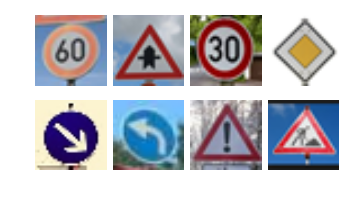

In [221]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg
import os

from scipy import misc


#fig, axs = plt.subplots(2,4, figsize=(32, 32))
#fig.subplots_adjust(hspace = .2, wspace=.001)
#axs = axs.ravel()

import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('/Users/macbook/PycharmProjects/untitled2/CarND-Traffic-Sign-Classifier-Project-master-Richard/my-found-traffic-signs/*x.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Question 7

Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._

Answer:
The model appears to have predicted the new signs perfectly, with 100% accuracy - much better than the 99.3% validation accuracy and the 93.5% test accuracy. 

In [222]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [3, 11, 1, 12, 38, 34, 18, 25]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

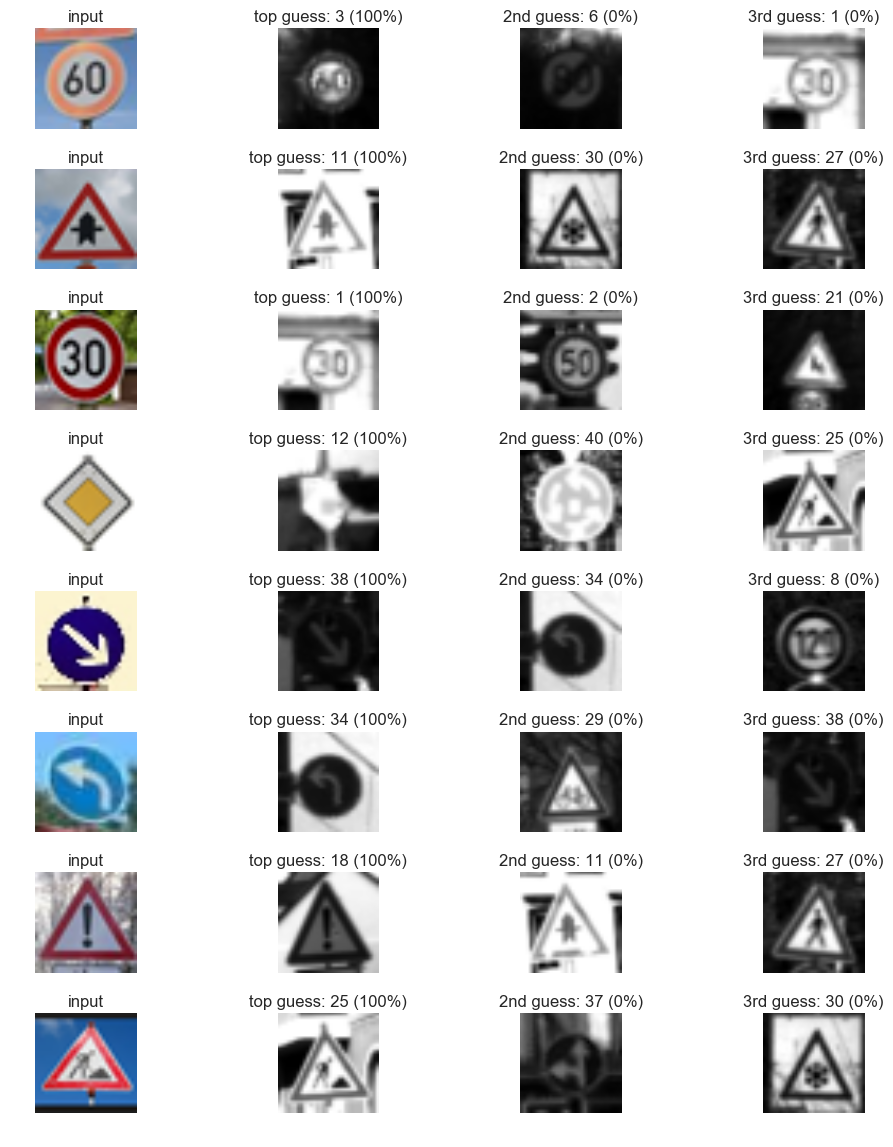

In [223]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

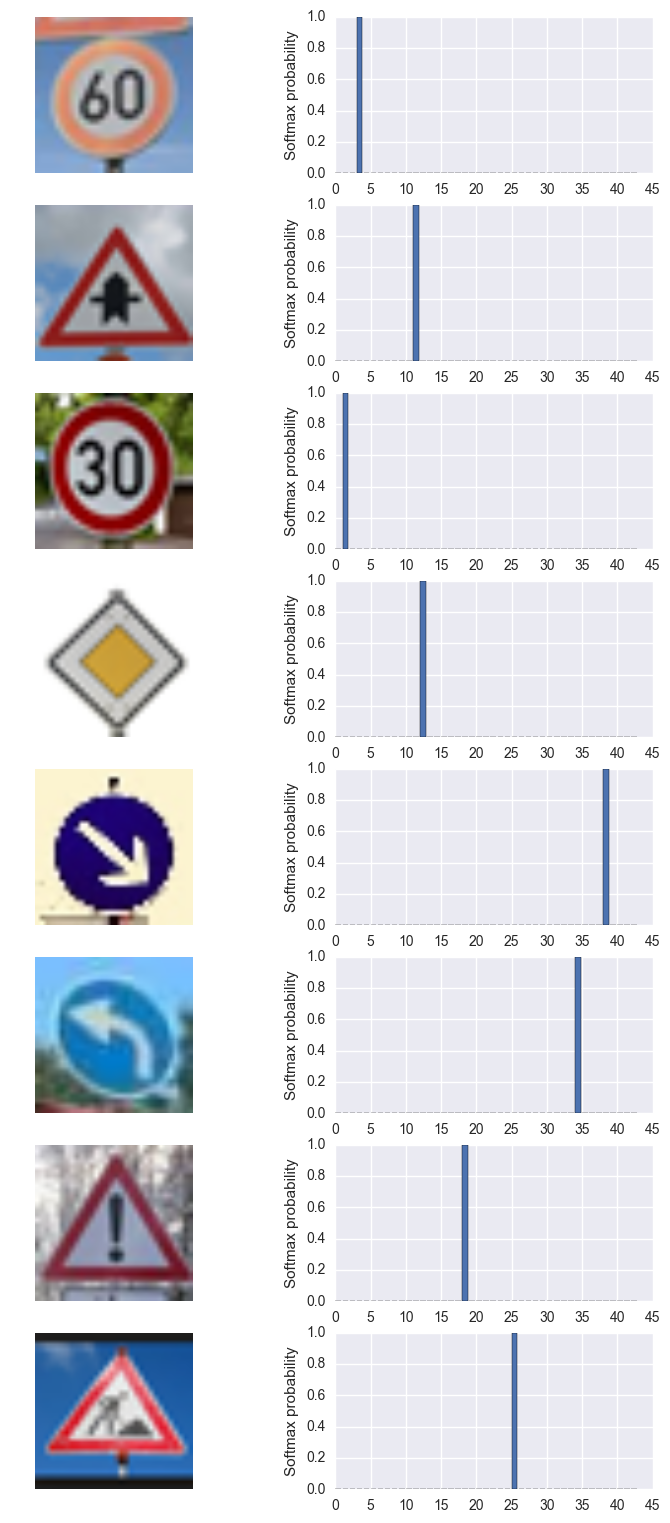

In [224]:
fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

**Answer:**

The model is somehow ONE HUNDRED PERCENT certain of the signs, as you can see above.